In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Hierarchical clustering
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is an iterative process that recursively merges or divides clusters until a certain criterion is met. Here are the steps involved:

Data Preparation: Start with a dataset where each data point is represented as a vector.

Distance Computation: Calculate the distance or dissimilarity between each pair of data points. Common distance metrics include Euclidean distance, Manhattan distance, or correlation distance.

Initialization: Treat each data point as a singleton cluster. Assign each data point to its own cluster.

Cluster Similarity Calculation: Compute the similarity or dissimilarity between clusters. This can be done using various linkage methods, such as single linkage, complete linkage, average linkage, or Ward's method.

Merge or Split Clusters: Based on the similarity/dissimilarity matrix, merge or split clusters iteratively. The choice of merging or splitting clusters depends on the specific linkage method used.

Hierarchy Construction: As clusters are merged or split, construct a hierarchy or dendrogram that represents the relationships between data points and clusters.

Stopping Criterion: Decide when to stop merging or splitting clusters. This can be based on a predetermined number of clusters, a threshold value of similarity/dissimilarity, or another criterion.

Cluster Assignment: Optionally, assign each data point to a cluster based on the hierarchy constructed. This step may involve cutting the dendrogram at a certain level to obtain a specific number of clusters.

Visualization: Visualize the hierarchical clustering results using dendrograms, which show the relationships between data points and clusters.

Interpretation: Analyze and interpret the clusters obtained. Depending on the application, you may need to further validate the clusters or use them for downstream analysis tasks.

If we cut the longest Vertical line, which none of the horizontal line is cutting we will get number of clusters.

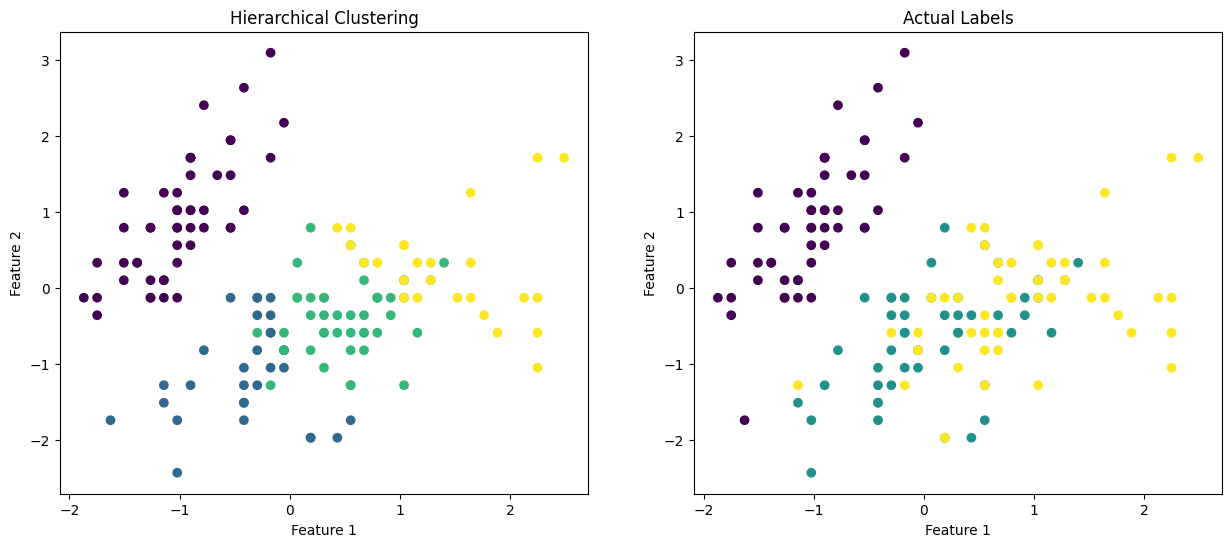

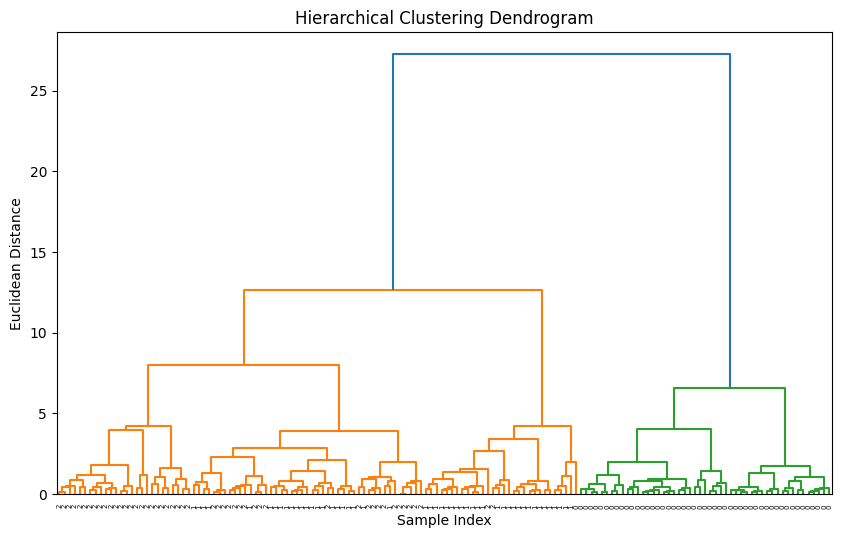

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Choose a cut-off distance to get 3 clusters, for example
distance_threshold = 7
clusters = fcluster(linked, distance_threshold, criterion='distance')

# Plotting the clusters and dendrogram
plt.figure(figsize=(15, 6))

# Plot for hierarchical clustering
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for actual labels
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', label=y)
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=y,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

plt.show()

#### Silhouette Score
The Silhouette Score evaluates the quality of clustering by assessing the cohesion and separation of clusters. It measures how similar a data point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates well-separated clusters, a value near 0 suggests overlapping clusters, and negative values indicate data points assigned to the wrong clusters. It helps in determining the optimal number of clusters, as higher silhouette scores imply more distinct clusters, facilitating better interpretation and analysis of the clustering results.

In [3]:
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, 'ward')

# Extract cluster labels with a specified distance threshold
distance_threshold = 7
clusters = fcluster(linked, distance_threshold, criterion='distance')

score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4006363159855973
